# **Importando librerias necesarias**

In [1]:
!pip install tensorflow==2.16.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 53.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 83.8 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.1
    Uninstalling tensorboard-2.15.1:
      Successfully uninstalled tensorboard-2.15.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
ten

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.stem.snowball import SnowballStemmer
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import re

# **Cargando Datos del Dataset y Preprocesando**

In [3]:
df = pd.read_csv('/kaggle/input/emotions/text.csv')
df.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


In [4]:
print(f'Dimension de los datos : {df.shape}') #(Filas,Columnas)

Dimension de los datos : (416809, 3)


In [5]:
df.duplicated().sum() #Comprobando las filas duplicadas

0

In [6]:
df.isnull().sum() #Comprobando las vacias

Unnamed: 0    0
text          0
label         0
dtype: int64

In [7]:
#Renombrando columnas para mayor legibilidad (inplance hace que no te devuelva un dataframe y guarde todo en el mismo dataframe)
df.rename(columns={'text': 'Text', 'label': 'Label'}, inplace=True)

In [8]:
#Eliminando la columna Unnamed , aparece en los csv donde hay un indice sin nombre
#axis 1 elimina columna , axis 0 una fila
df.drop('Unnamed: 0',axis=1,inplace=True)

In [9]:
#Visualizando cambios 
df.head()

,Text,Label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


In [10]:
#Renombrando las columnas a las emociones (ingles es el idioma del dataset)
#0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'
df['Label'] = df['Label'].replace(0,'Sadness')
df['Label'] = df['Label'].replace(1,'Joy')
df['Label'] = df['Label'].replace(2,'Love')
df['Label'] = df['Label'].replace(3,'Anger')
df['Label'] = df['Label'].replace(4,'Fear')
df['Label'] = df['Label'].replace(5,'Surprise')

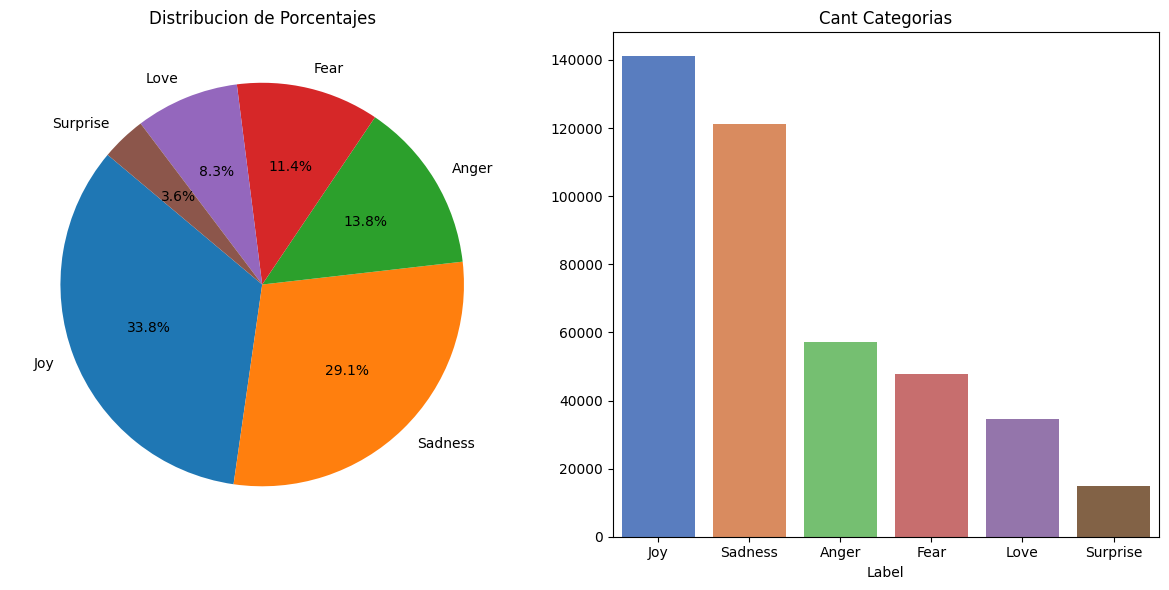

In [11]:
#Visualizando graficos para entender mejor el dataset

# Sumando la cant de cada categoria
count = df['Label'].value_counts()

# Creando figura con dos graficos 
fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor='white')

# Grafico de Pastel
palette = sns.color_palette("muted")
sns.set_palette(palette)
axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribucion de Porcentajes')

# Grafico de Barras
sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="muted")
axs[1].set_title('Cant Categorias')

plt.tight_layout()

plt.show()